<a href="https://colab.research.google.com/github/Hikiiiiiiii/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

# Importing libraries 🐍

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 📁

In [218]:
df = pd.read_csv("house_prices.csv")

In [219]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
162,5460000,6600,4,2,2,yes,yes,yes,no,no,0,yes,semi-furnished
385,3570000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
457,3115000,3000,3,1,1,no,no,no,no,yes,0,no,unfurnished
458,3115000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
156,5523000,6900,3,1,1,yes,yes,yes,no,no,0,yes,semi-furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
405,3465000,3060,3,1,1,yes,no,no,no,no,0,no,unfurnished


In [220]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [221]:
df.shape # data shape

(545, 13)

In [222]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [223]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [224]:
df.duplicated().sum() # duplicate values check

0

In [225]:
data=df.copy()

#### 1. Create a scatter plot

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='price', ylabel='area'>

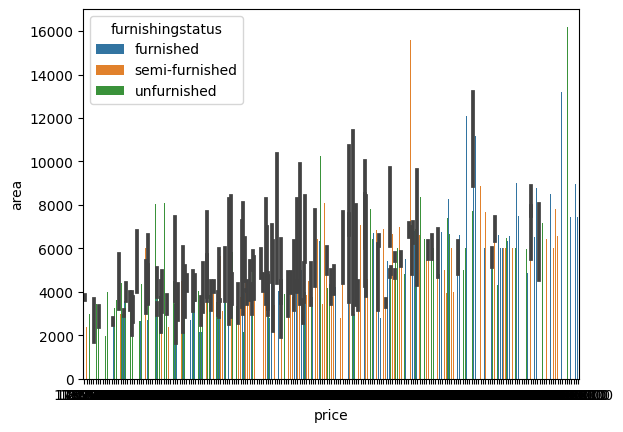

In [226]:
# Put your answer here
sns.barplot(x=df['price'],y=df['area'],hue=df["furnishingstatus"])

#### 2. Apply the `get_dummies()` method to the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [227]:
# Put your answer here
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)


#### 3. Drop the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [228]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)
data.head()


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


#### 4. Split the data set into a training and test set

In [229]:
# Put your answer here
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### 4. Use the the `MinMaxScaler()` method to scale down the training and test set.

In [230]:
# Put your answer here
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Create a new instance of a Linear Regression model  

In [231]:
# Put your answer here
model = LinearRegression()

#### 6. Use the `fit()` method to train your model using the training set.

In [232]:
# Put your answer here
model.fit(X_train, y_train)


LinearRegression()

#### 7. Use the `predict()` method using the test set

In [233]:
 # Put your answer here
y_pred = model.predict(X_test)

#### 7. Get the R2 Score

In [234]:
# Put your answer here
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print (f"Mean Square Erroe : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))

Mean Square Erroe : 1030468073644.2429
R2 Score : 0.6764172908773478


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

8. #### Use the normal equation to get the optimal slope and intercept

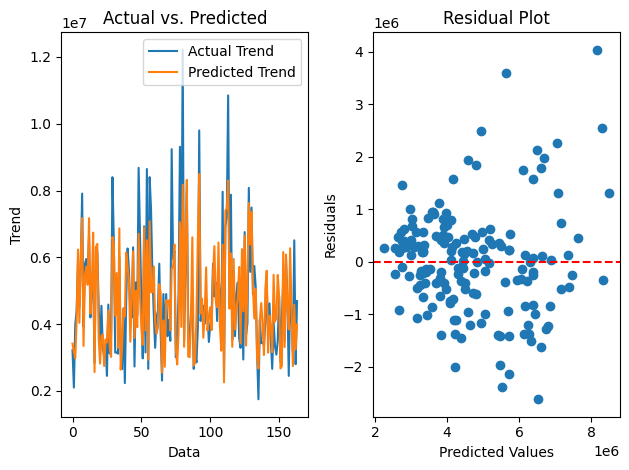

0.6764172908773478

In [235]:
# Put your answer here
# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')

# Plot Residuals
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
r2
